# simple graph example

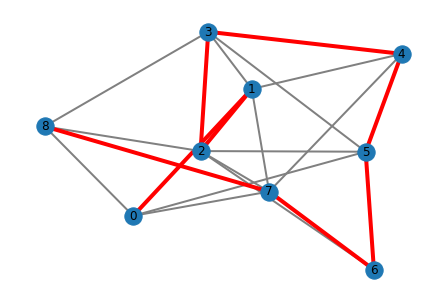

In [14]:
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
colors= ['red' if edge[0]==edge[1]-1 else 'grey' for edge in g.edges()]
width= [4 if edge[0]==edge[1]-1 else 2 for edge in g.edges()]
nx.draw(g,edge_color=colors, width=width, with_labels=True)

#update_f=GraphCNN(features)

(-2.0, 0.05000891830399607)

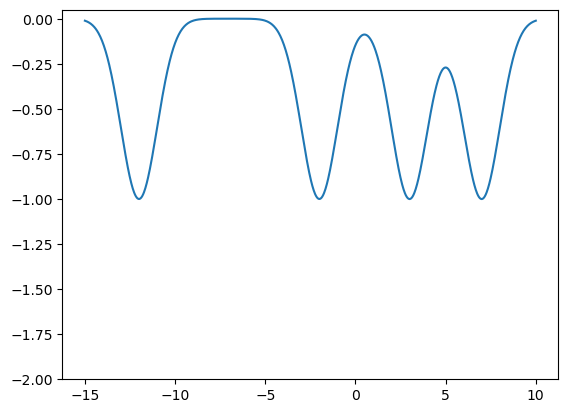

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


x=np.linspace(-15,10,1000)
y=-gaussian(x,-12,1)-gaussian(x,-2,1)-gaussian(x,3,1)-gaussian(x,7,1)

plt.plot(x,y)

plt.ylim(bottom=-2)


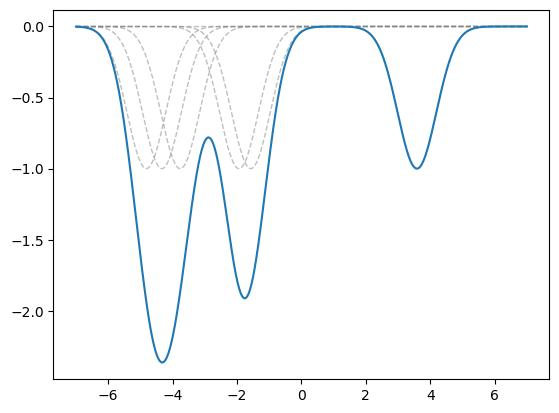

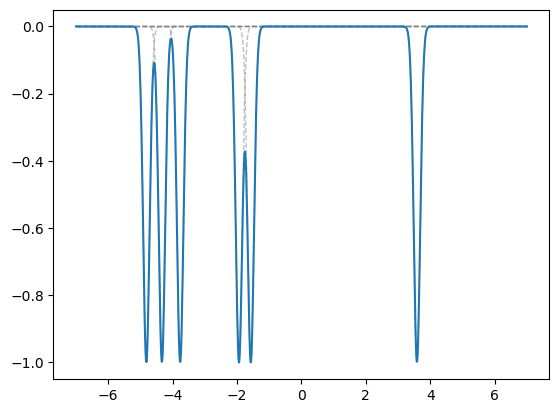

In [53]:
means=np.random.uniform(-5,5,6)
x=np.linspace(-7,7,1000)


In [69]:
#append element to numpy array
means[-1]=-6.3

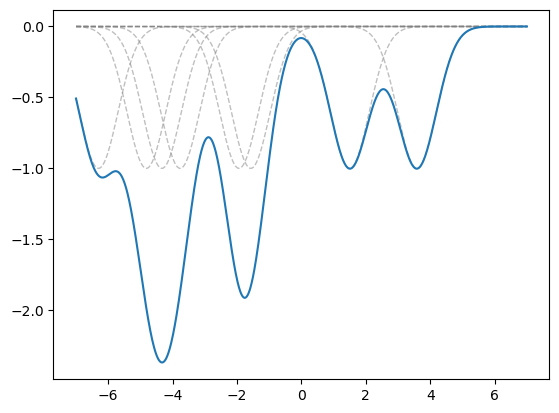

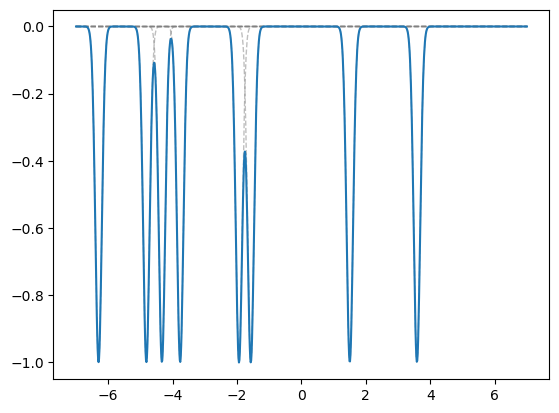

In [70]:
y=np.zeros_like(x)
for mean in means:
    plt.plot(x,-gaussian(x,mean,.6),color='gray',alpha=0.5,linestyle='--',linewidth=1)
    y-=gaussian(x,mean,.6)

plt.plot(x,y)
plt.show()
y=np.zeros_like(x)
for mean in means:
    plt.plot(x,-gaussian(x,mean,.1),color='gray',alpha=0.5,linestyle='--',linewidth=1)
    y-=gaussian(x,mean,.1)

plt.plot(x,y)

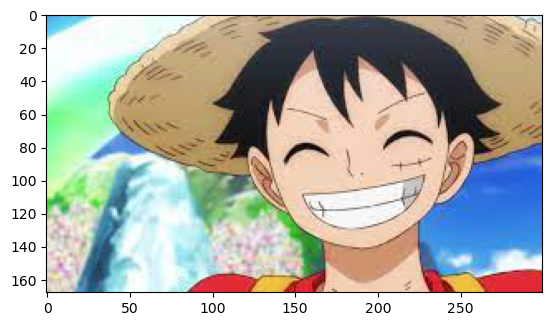

In [3]:
import cv2
from matplotlib import pyplot as plt
import skimage.measure
import numpy as np
import matplotlib.image as mpimg

image_path = 'website/images/luffy.jpg'
img = cv2.imread(image_path, 2)

plt.imshow(mpimg.imread(image_path))

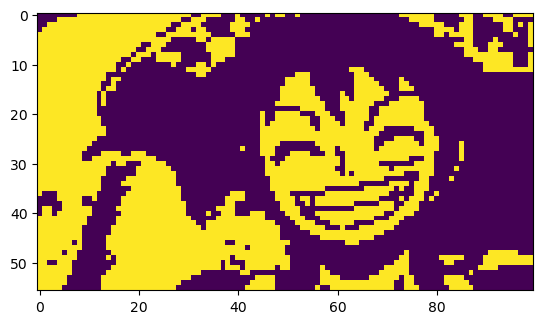

In [13]:
ret, bw_img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)

bw_img = skimage.measure.block_reduce(bw_img, (3, 3), np.min)

plt.imshow(bw_img)


In [1]:
from website.images.image_processing import img_to_json, img_to_bmp
character='zoro'
image_path = f'website/images/{character}.jpg'
shape=(64,64)


img_to_json(image_path,f'website/images/patterns_json/{character}.json',shape)
img_to_bmp(image_path,f'website/images/{character}.bmp',shape)


In [11]:
from website.images.image_processing import get_folder_filenames

path='website/images/patterns_json'
get_folder_filenames(path,path+'/patterns.json')

In [2]:
import json

# Convert the NumPy array to a regular Python list
python_list = (bw_img//255).tolist()

# Convert the Python list to a JSON string
json_str = json.dumps(python_list)

# Save the JSON string to a file
with open('array_data.json', 'w') as file:
    file.write(json_str)


NameError: name 'bw_img' is not defined